In [10]:
import sys
from pathlib import Path
print(sys.path)

['/nfs/primary/MSRCall/DPAnalyzer/exp', '/opt/miniconda3/lib/python310.zip', '/opt/miniconda3/lib/python3.10', '/opt/miniconda3/lib/python3.10/lib-dynload', '', '/opt/miniconda3/lib/python3.10/site-packages']


In [4]:
sys.path.insert(0, Path(sys.path[0]).parent.as_posix())

In [5]:
from lxml import etree
from cent import between_cent, degree_cent, eigen_cent
import logging
from pathlib import Path

logging.basicConfig(level=logging.DEBUG,
                    format='%(asctime)s [%(levelname)s]: %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S'
                )
logger = logging.getLogger(__name__)
file_handler = logging.FileHandler('cent_cal_notebook.log')
file_handler.setLevel(logging.DEBUG)
file_formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(file_formatter)
logger.addHandler(file_handler)



In [6]:

def parse_graphml_in_chunks(file_path):
    context = etree.iterparse(file_path, events=("start", "end"))
    nodes = {}
    edges = []
    
    for event, elem in context:
        if event == "end" and elem.tag == "{http://graphml.graphdrawing.org/xmlns}node":
            # Process node
            node_id = elem.attrib['id']
            # Extract other attributes if needed, e.g. CVE_Severity
            attributes = {data.attrib['key']: data.text for data in elem.findall("{http://graphml.graphdrawing.org/xmlns}data")}
            nodes[node_id] = attributes
            elem.clear()  # Clear memory

        elif event == "end" and elem.tag == "{http://graphml.graphdrawing.org/xmlns}edge":
            # Process edge
            source = elem.attrib['source']
            target = elem.attrib['target']
            # Extract edge attributes
            attributes = {data.attrib['key']: data.text for data in elem.findall("{http://graphml.graphdrawing.org/xmlns}data")}
            edges.append((source, target, attributes))
            elem.clear()  # Clear memory
            
    return nodes, edges

# Usage
nodes, edges = parse_graphml_in_chunks('../data/graph_metric.graphml')

## Calculate the degree centrality

In [7]:
# ------ calculate the degree_centrality ------
top_degree_cel = degree_cent.cal_degree_centrality(nodes, edges)
logger.info(f"the top 10 nodes with highest degree centrality are: {top_degree_cel}")


2024-11-30 17:11:35 [INFO]: the top 10 nodes with highest degree centrality are: [('n1102961', 2776187), ('n771170', 1966542), ('n83995', 1716650), ('n380430', 1579004), ('n5202385', 1098655), ('n1507948', 888778), ('n104138', 870442), ('n775870', 860781), ('n6778330', 701639), ('n1584446', 667337)]


## Calculate the betweenness centrality

In [ ]:
betcenter = between_cent.BetCent(nodes, edges)
top_between_cel = betcenter.cal_between_cent()
logger.info(f"the top 10 nodes with highest betweenness centrality are: {top_between_cel}")


## Calculate the Eigenvector Centrality

In [1]:

att_features = ["freshness", "popularity", "speed", "severity"]

eigencenter = eigen_cent.EigenCent(nodes, edges, att_features)
# process node attribute values to right format
eigencenter._quan_attrs()
eigencenter._covt_df()

eigencenter._step_wise_reg(0.05, att_features)
# analyse processed attributes
eigencenter._weight_ana()

# get the eigen centrality
top_eigen_nodes = eigencenter.cal_weighted_eigen_cent(nodes)
logger.info(f"the top 10 nodes with highest eigen centrality are: {top_eigen_nodes}")


NameError: name 'eigen_cent' is not defined

## measure the basic centrality

In [11]:
# measurement on original graph
top_degree_cel =[('junit:junit', 2776187), ('org.slf4j:slf4j-api', 1966542), ('org.mockito:mockito-core', 1716650), ('org.scala-lang:scala-library', 1579004), ('org.assertj:assertj-core', 1098655), ('ch.qos.logback:logback-classic', 888778), ('com.google.guava:guava', 870442), ('com.fasterxml.jackson.core:jackson-databind', 860781), ('org.hamcrest:hamcrest-all', 701639), ('org.projectlombok:lombok', 667337)]
top_between_cel = [('com.splendo.kaluga:alerts-androidlib', 0), ('org.wso2.carbon.identity.framework:org.wso2.carbon.identity.cors.mgt.core', 0), ('org.apache.camel.quarkus:camel-quarkus-kotlin-parent', 0), ('org.wso2.carbon.identity.framework:org.wso2.carbon.identity.cors.mgt.core:5.20.111', 0), ('org.apache.camel.quarkus:camel-quarkus-kotlin-parent:1.0.0-M4', 0), ('org.apache.camel.quarkus:camel-quarkus-kotlin-parent:1.0.0-M3', 0), ('org.wso2.carbon.identity.framework:org.wso2.carbon.identity.cors.mgt.core:5.20.113', 0), ('org.wso2.carbon.identity.framework:org.wso2.carbon.identity.cors.mgt.core:5.20.112', 0), ('org.wso2.carbon.identity.framework:org.wso2.carbon.identity.cors.mgt.core:5.20.115', 0), ('org.apache.camel.quarkus:camel-quarkus-kotlin-parent:1.0.0-M2', 0)]
# eigenvector value for indegree
# top_eigen_cel = [('junit:junit', 0.4364886911209045), ('com.fasterxml.jackson.core:jackson-core', 0.43285272545585557), ('com.fasterxml.jackson.core:jackson-annotations', 0.4324470234878046), ('javax.measure:jsr-275', 0.30530566427139494), ('org.powermock:powermock-module-junit4', 0.27315635691726997), ('org.powermock:powermock-api-mockito', 0.2725636966519481), ('org.codehaus.groovy:groovy', 0.14964503909689772), ('cglib:cglib', 0.14963831416710613), ('org.hibernate:hibernate-cglib-repack', 0.1496350750361814), ('com.google.jimfs:jimfs', 0.09354835280106276)]
# eigenvector with only cve
top_cve_eigen_out_cel = [('org.testng:testng', 0.34013267332633407), ('org.wso2.carbon:org.wso2.carbon.core', 0.3117589890453655), ('org.apache.felix:org.apache.felix.scr.ds-annotations', 0.30410398278910034), ('org.powermock:powermock-module-testng', 0.2724062732622492), ('commons-lang.wso2:commons-lang', 0.23094956931190813), ('org.wso2.orbit.org.apache.neethi:neethi', 0.22173591858187613), ('org.powermock:powermock-api-mockito', 0.2148369145417151), ('org.wso2.orbit.commons-collections:commons-collections', 0.2012911460636464), ('org.ops4j.pax.logging:pax-logging-api', 0.19577463082654883), ('org.wso2.carbon:org.wso2.carbon.user.core', 0.17136366179087725)]
# eigenvector with weight
top_cve_eigen_weight_cel = [('com.amazonaws:jmespath-java', 0.30431482648980274), ('com.amazonaws:aws-java-sdk-core', 0.299084913106049), ('com.amazonaws:aws-java-sdk-test-utils', 0.2875099726017517), ('software.amazon.awssdk:sdk-core', 0.242477670262331), ('software.amazon.awssdk:protocol-core', 0.24160873634919178), ('software.amazon.awssdk:aws-core', 0.22884726669853164), ('software.amazon.awssdk:regions', 0.2283479170368613), ('software.amazon.awssdk:auth', 0.22785885047071375), ('software.amazon.awssdk:annotations', 0.22074805339040127), ('software.amazon.awssdk:aws-json-protocol', 0.21817979075303265)]

In [12]:
# measurement on new dependency graph based on releases
top_degree_software_cel = [('authentication.framework', 1890), ('org.wso2.carbon.apimgt:forum', 1817), ('com.amazonaws:aws-java-sdk-s3', 1420), ('org.noear:solon', 704), ('com.graphql-java:graphql-java', 673), ('com.liferay.portal:com.liferay.portal.kernel', 568), ('com.guicedee.services:commons-text', 445), ('org.xwiki.commons:xwiki-commons-velocity', 441), ('com.nepxion:discovery', 433)]
top_degree_release_cel = [('org.opencms:opencms-core:16.0', 196), ('org.opencms:opencms-core:15.0', 196), ('org.opencms:opencms-core:14.0', 192), ('org.opencms:opencms-core:13.0', 189), ('org.opencms:opencms-core:12.0', 187), ('org.apereo.cas:cas-server-webapp:5.3.12.1', 185), ('org.apereo.cas:cas-server-webapp:5.3.11', 185), ('org.apereo.cas:cas-server-webapp:5.3.12', 185), ('org.apereo.cas:cas-server-webapp:5.3.13', 185), ('org.apereo.cas:cas-server-webapp:5.3.15.1', 184)]

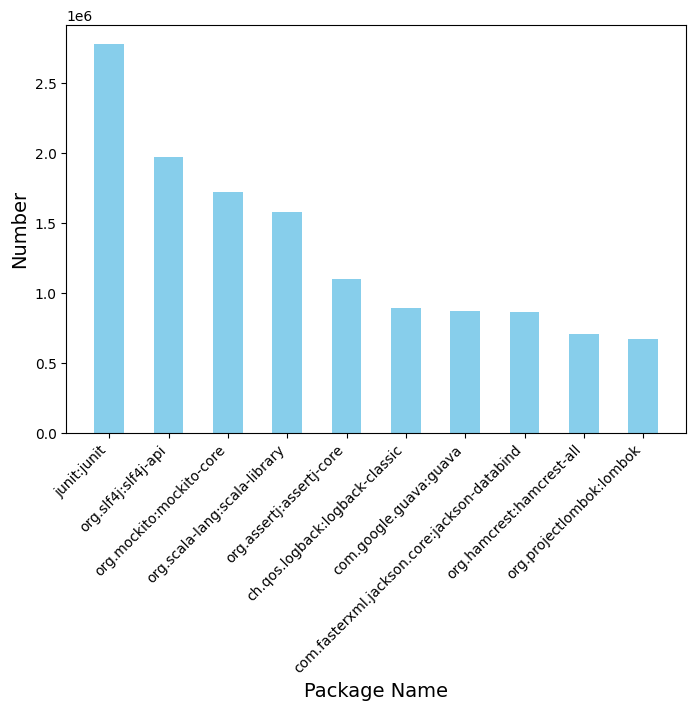

In [3]:
import matplotlib.pyplot as plt

# Data
top_degree_cel = [
    ('junit:junit', 2776187), 
    ('org.slf4j:slf4j-api', 1966542), 
    ('org.mockito:mockito-core', 1716650), 
    ('org.scala-lang:scala-library', 1579004), 
    ('org.assertj:assertj-core', 1098655), 
    ('ch.qos.logback:logback-classic', 888778), 
    ('com.google.guava:guava', 870442), 
    ('com.fasterxml.jackson.core:jackson-databind', 860781), 
    ('org.hamcrest:hamcrest-all', 701639), 
    ('org.projectlombok:lombok', 667337)
]

# Extract package names and corresponding values
packages, values = zip(*top_degree_cel)

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(packages, values, color='skyblue', width=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add titles and labels
# plt.title('Top Degree Centrality of Packages', fontsize=14)
plt.xlabel('Package Name', fontsize=14)
plt.ylabel('Number', fontsize=14)

# Show the plot
plt.subplots_adjust(bottom=0.2)
plt.show()


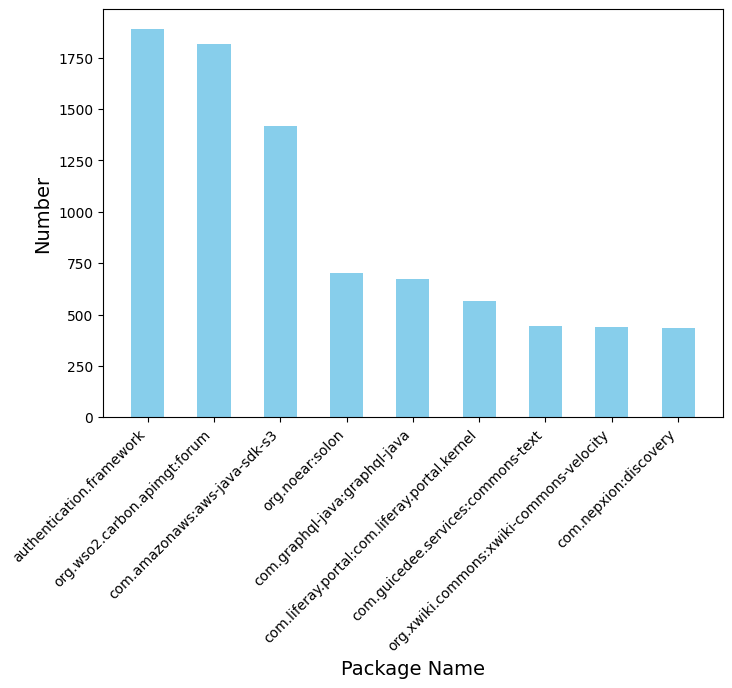

In [6]:

# Extract package names and corresponding values
packages, values = zip(*top_degree_software_cel)
print(top_degree_software_cel)
# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(packages, values, color='skyblue', width=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add titles and labels
# plt.title('Top Degree Centrality of Packages', fontsize=14)
plt.xlabel('Package Name', fontsize=14)
plt.ylabel('Number', fontsize=14)

# Show the plot
plt.subplots_adjust(bottom=0.2)
plt.show()


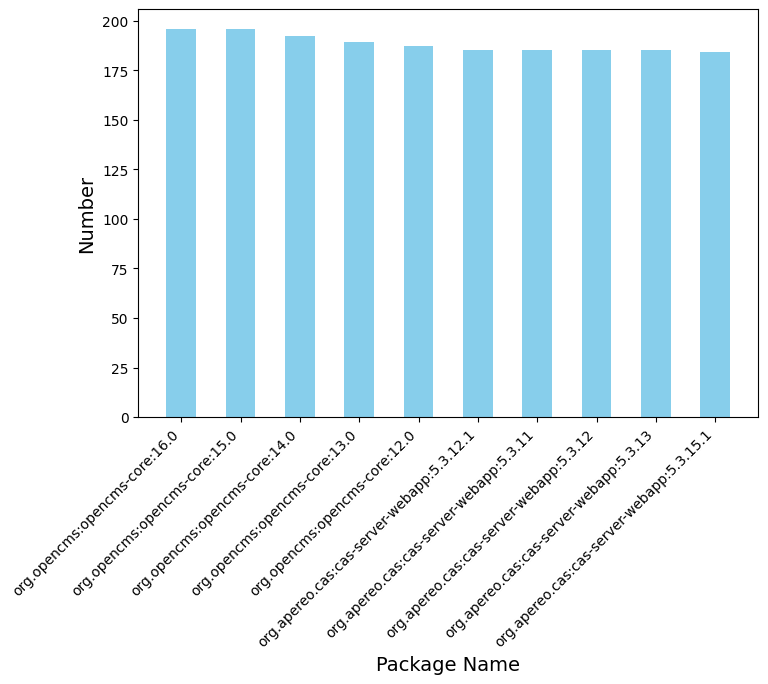

In [7]:

# Extract package names and corresponding values
packages, values = zip(*top_degree_release_cel)
print(top_degree_release_cel)
# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(packages, values, color='skyblue', width=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add titles and labels
# plt.title('Top Degree Centrality of Packages', fontsize=14)
plt.xlabel('Package Name', fontsize=14)
plt.ylabel('Number', fontsize=14)

# Show the plot
plt.subplots_adjust(bottom=0.2)
plt.show()


[('junit:\njunit', 0.4364886911209045), ('com.fasterxml.jackson.core:\njackson-core', 0.43285272545585557), ('com.fasterxml.jackson.core:\njackson-annotations', 0.4324470234878046), ('javax.measure:\njsr-275', 0.30530566427139494), ('org.powermock:\npowermock-module-junit4', 0.27315635691726997), ('org.powermock:\npowermock-api-mockito', 0.2725636966519481), ('org.codehaus.groovy:\ngroovy', 0.14964503909689772), ('cglib:\ncglib', 0.14963831416710613), ('org.hibernate:\nhibernate-cglib-repack', 0.1496350750361814), ('com.google.jimfs:\njimfs', 0.09354835280106276)]


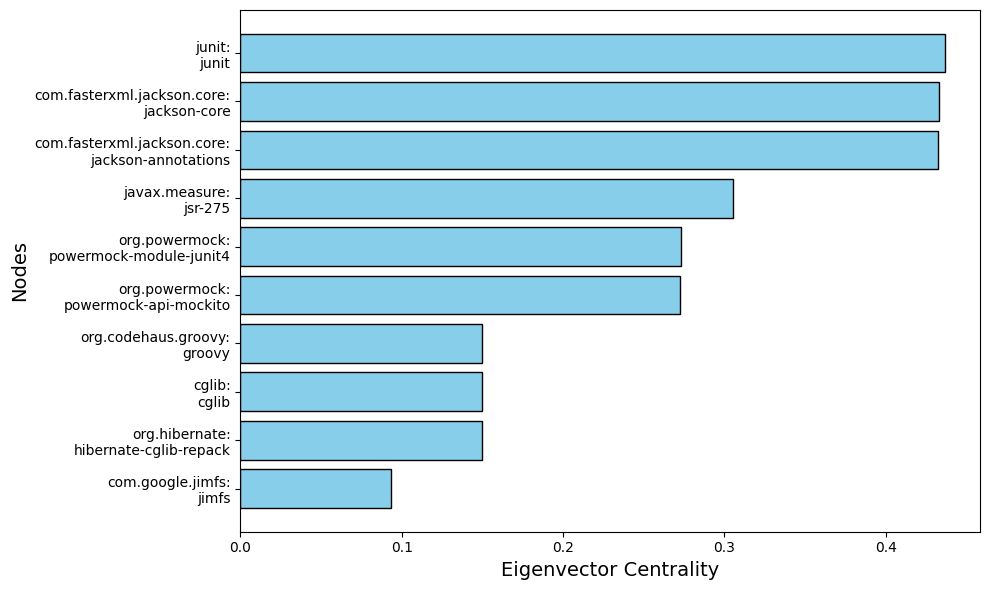

In [13]:

# Data: List of tuples containing node names and their eigenvector centrality scores
top_eigen_cel = [
    ('junit:junit', 0.4364886911209045),
    ('com.fasterxml.jackson.core:jackson-core', 0.43285272545585557),
    ('com.fasterxml.jackson.core:jackson-annotations', 0.4324470234878046),
    ('javax.measure:jsr-275', 0.30530566427139494),
    ('org.powermock:powermock-module-junit4', 0.27315635691726997),
    ('org.powermock:powermock-api-mockito', 0.2725636966519481),
    ('org.codehaus.groovy:groovy', 0.14964503909689772),
    ('cglib:cglib', 0.14963831416710613),
    ('org.hibernate:hibernate-cglib-repack', 0.1496350750361814),
    ('com.google.jimfs:jimfs', 0.09354835280106276)
]

top_eigen_cel = [(pkg.replace(":", ":\n"), value) for (pkg, value) in top_eigen_cel]
print(top_eigen_cel)
# Separate data into two lists for plotting
nodes, centrality_scores = zip(*top_eigen_cel)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(nodes, centrality_scores, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Eigenvector Centrality', fontsize=14)
plt.ylabel('Nodes', fontsize=14)
# plt.title('Top Nodes by Eigenvector Centrality', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top

# Show plot
plt.tight_layout()
plt.show()


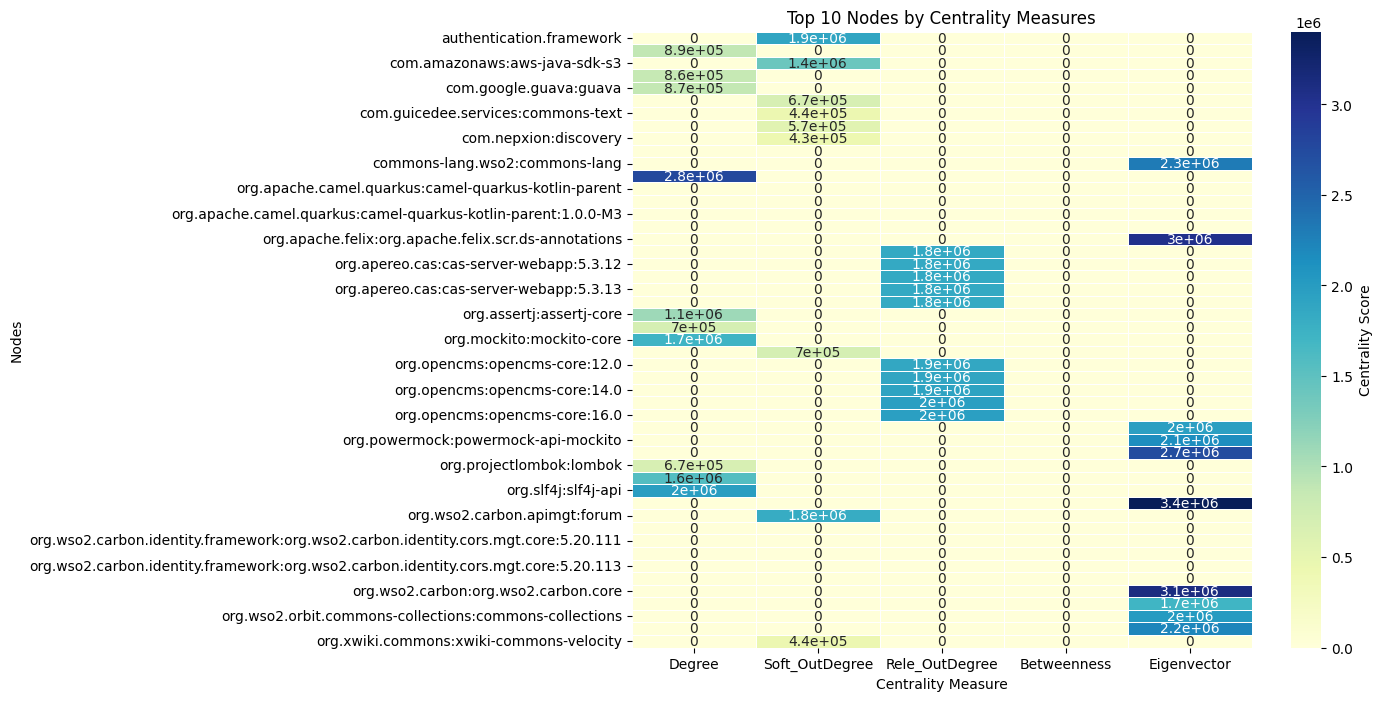

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert lists of tuples into dictionaries
degree_dict = dict(top_degree_cel)
degree_soft_vul_dict =dict(top_degree_software_cel)
degree_rele_vul_dict =dict(top_degree_release_cel)
betweenness_dict = dict(top_between_cel)
eigenvector_dict = dict(top_cve_eigen_out_cel)


# Collect all unique nodes and sort them
all_nodes = sorted(set(degree_dict) | set(betweenness_dict) | set(eigenvector_dict) | set(degree_soft_vul_dict) | set(degree_rele_vul_dict))

# Create a DataFrame with nodes as rows and centralities as columns
data = pd.DataFrame({
    'Degree': [degree_dict.get(node, 0) for node in all_nodes],
    'Soft_OutDegree': [degree_soft_vul_dict.get(node, 0)*1000 for node in all_nodes],
    "Rele_OutDegree":  [degree_rele_vul_dict.get(node, 0)*10000 for node in all_nodes],
    'Betweenness': [betweenness_dict.get(node, 0) for node in all_nodes],
    'Eigenvector': [eigenvector_dict.get(node, 0)*10000000 for node in all_nodes]
}, index=all_nodes)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Centrality Score'}, linewidths=0.5)

# Add labels and title
plt.title('Top 10 Nodes by Centrality Measures')
plt.xlabel('Centrality Measure')
plt.ylabel('Nodes')
plt.show()

In [15]:
import numpy as np

def standardize_centralities(centralities):
    names, values = zip(*centralities)
    values = np.array(values, dtype=float)  # Convert to float for standardization
    
    # Standardize: (value - mean) / std
    mean = np.mean(values)
    std_dev = np.std(values)
    
    # Handle case where std_dev is 0 to avoid division by zero
    if std_dev > 0:
        standardized_values = (values - mean) / std_dev
    else:
        standardized_values = values - mean  # Only centering if std_dev is 0
    
    # Return as list of tuples (name, standardized_value)
    return list(zip(names, standardized_values))

# Example usage
top_degree_standardized = standardize_centralities(top_degree_cel)
top_soft_degree_standardized =standardize_centralities(top_degree_software_cel)
top_rele_degree_standardized =standardize_centralities(top_degree_release_cel)
top_between_standardized = standardize_centralities(top_between_cel)
top_eigen_standardized = standardize_centralities(top_cve_eigen_out_cel)


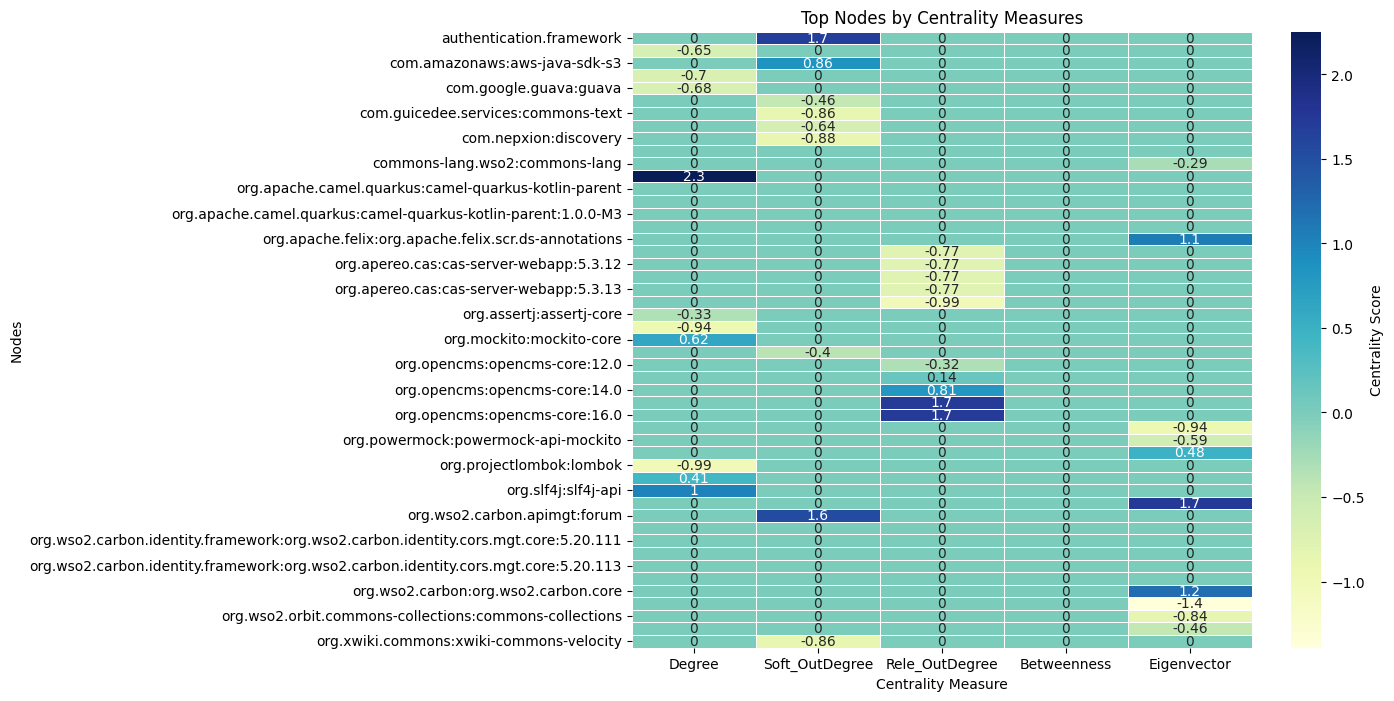

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert lists of tuples into dictionaries
degree_dict = dict(top_degree_standardized)
degree_soft_vul_dict =dict(top_soft_degree_standardized)
degree_rele_vul_dict =dict(top_rele_degree_standardized)
betweenness_dict = dict(top_between_standardized)
eigenvector_dict = dict(top_eigen_standardized)

# Collect all unique nodes and sort them
all_nodes = sorted(set(degree_dict) | set(betweenness_dict) | set(eigenvector_dict) | set(degree_soft_vul_dict) | set(degree_rele_vul_dict))

# Create a DataFrame with nodes as rows and centralities as columns
data = pd.DataFrame({
    'Degree': [degree_dict.get(node, 0) for node in all_nodes],
    'Soft_OutDegree': [degree_soft_vul_dict.get(node, 0) for node in all_nodes],
    "Rele_OutDegree":  [degree_rele_vul_dict.get(node, 0) for node in all_nodes],
    'Betweenness': [betweenness_dict.get(node, 0) for node in all_nodes],
    'Eigenvector': [eigenvector_dict.get(node, 0) for node in all_nodes]
}, index=all_nodes)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Centrality Score'}, linewidths=0.5)

# Add labels and title
plt.title('Top Nodes by Centrality Measures')
plt.xlabel('Centrality Measure')
plt.ylabel('Nodes')
plt.show()

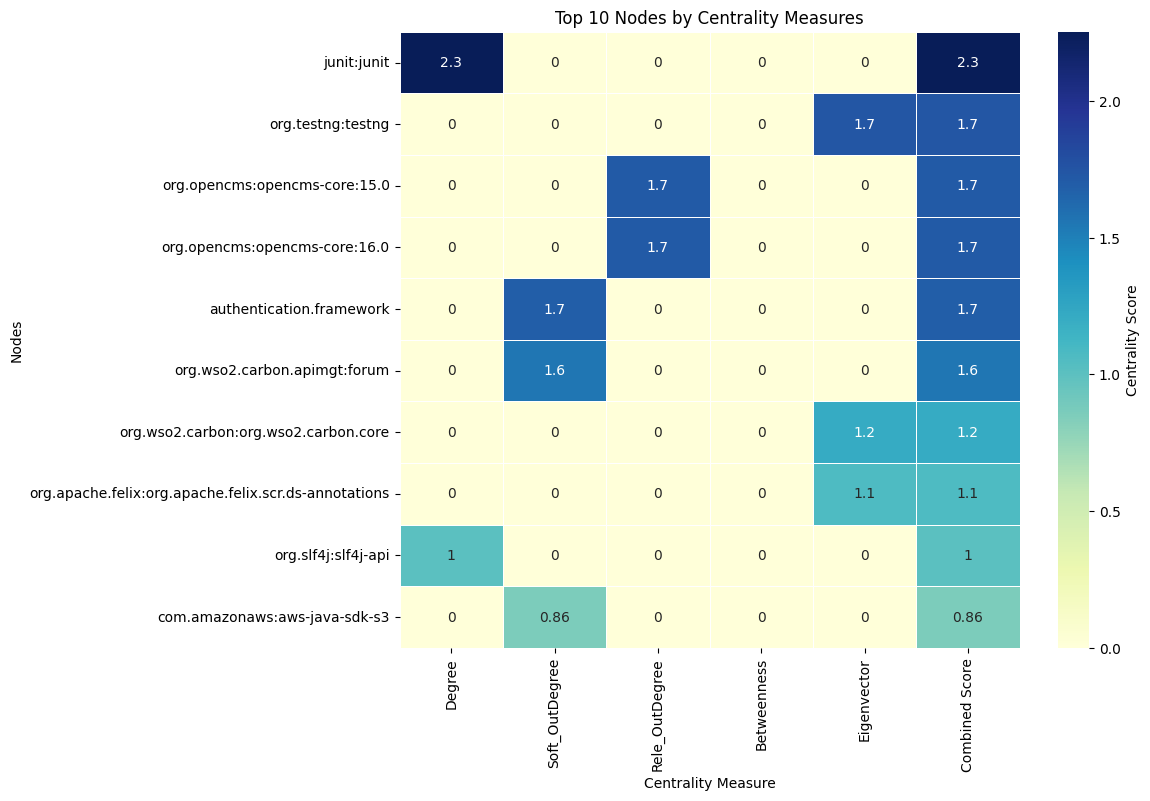

Top 10 Nodes by Combined Centrality Score:
                                                      Degree  Soft_OutDegree  \
junit:junit                                         2.253368        0.000000   
org.testng:testng                                   0.000000        0.000000   
org.opencms:opencms-core:15.0                       0.000000        0.000000   
org.opencms:opencms-core:16.0                       0.000000        0.000000   
authentication.framework                            0.000000        1.681888   
org.wso2.carbon.apimgt:forum                        0.000000        1.553683   
org.wso2.carbon:org.wso2.carbon.core                0.000000        0.000000   
org.apache.felix:org.apache.felix.scr.ds-annota...  0.000000        0.000000   
org.slf4j:slf4j-api                                 1.006821        0.000000   
com.amazonaws:aws-java-sdk-s3                       0.000000        0.856458   

                                                    Rele_OutDegree  \
junit:

In [18]:
# Convert lists of tuples into dictionaries
# degree_dict = dict(top_degree_standardized)
degree_soft_vul_dict =dict(top_soft_degree_standardized)
degree_rele_vul_dict =dict(top_rele_degree_standardized)
betweenness_dict = dict(top_between_standardized)
eigenvector_dict = dict(top_eigen_standardized)

# Collect all unique nodes and sort them
all_nodes = sorted(set(degree_dict) | set(betweenness_dict) | set(eigenvector_dict) | set(degree_soft_vul_dict) | set(degree_rele_vul_dict))

# Create a DataFrame with nodes as rows and centralities as columns
data = pd.DataFrame({
    'Degree': [degree_dict.get(node, 0) for node in all_nodes],
    'Soft_OutDegree': [degree_soft_vul_dict.get(node, 0) for node in all_nodes],
    "Rele_OutDegree":  [degree_rele_vul_dict.get(node, 0) for node in all_nodes],
    'Betweenness': [betweenness_dict.get(node, 0) for node in all_nodes],
    'Eigenvector': [eigenvector_dict.get(node, 0) for node in all_nodes]
}, index=all_nodes)

# Compute a combined score (e.g., sum of scores)
data['Combined Score'] = data.sum(axis=1)

# Sort by the combined score and take the top 10
top_10_nodes = data.nlargest(10, 'Combined Score')

# Plot the heatmap for top 10 nodes
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_nodes, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Centrality Score'}, linewidths=0.5)

# Add labels and title
plt.title('Top 10 Nodes by Centrality Measures')
plt.xlabel('Centrality Measure')
plt.ylabel('Nodes')
plt.show()

# Display the top 10 nodes
print("Top 10 Nodes by Combined Centrality Score:")
print(top_10_nodes)

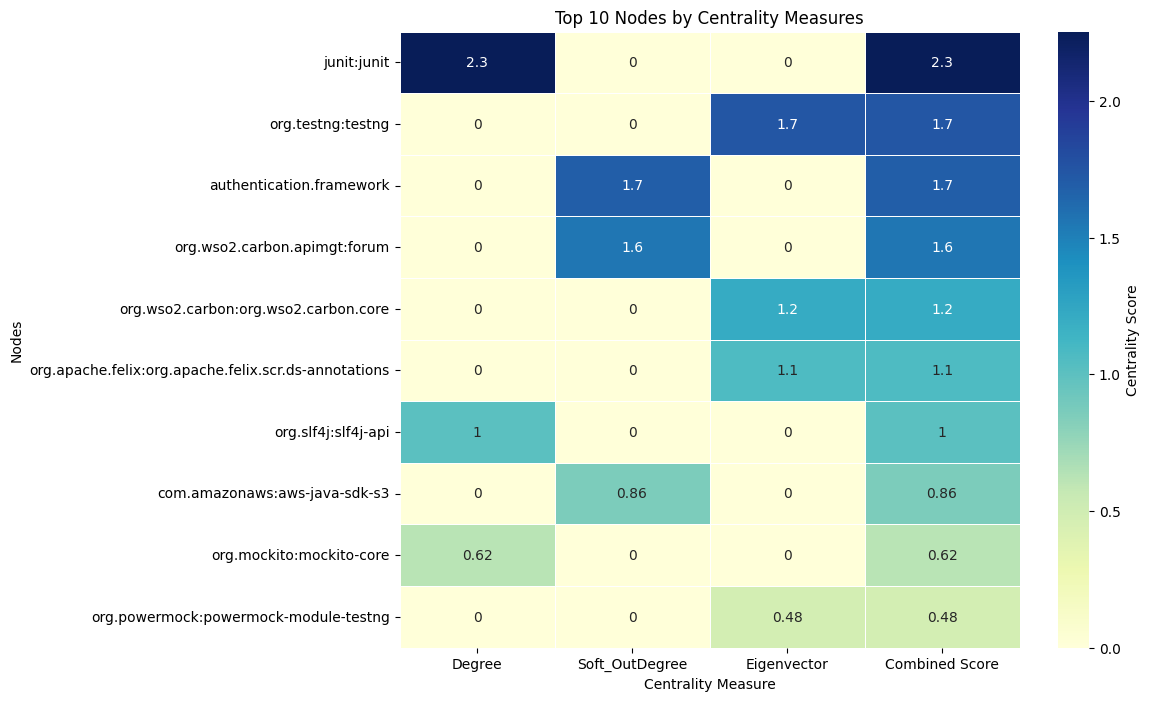

Top 10 Nodes by Combined Centrality Score:
                                                      Degree  Soft_OutDegree  \
junit:junit                                         2.253368        0.000000   
org.testng:testng                                   0.000000        0.000000   
authentication.framework                            0.000000        1.681888   
org.wso2.carbon.apimgt:forum                        0.000000        1.553683   
org.wso2.carbon:org.wso2.carbon.core                0.000000        0.000000   
org.apache.felix:org.apache.felix.scr.ds-annota...  0.000000        0.000000   
org.slf4j:slf4j-api                                 1.006821        0.000000   
com.amazonaws:aws-java-sdk-s3                       0.000000        0.856458   
org.mockito:mockito-core                            0.622082        0.000000   
org.powermock:powermock-module-testng               0.000000        0.000000   

                                                    Eigenvector  \
junit:jun

In [20]:
# Convert lists of tuples into dictionaries
degree_dict = dict(top_degree_standardized)
degree_soft_vul_dict =dict(top_soft_degree_standardized)
eigenvector_dict = dict(top_eigen_standardized)

# Collect all unique nodes and sort them
all_nodes = sorted(set(eigenvector_dict) | set(degree_soft_vul_dict) | set(degree_dict))

# Create a DataFrame with nodes as rows and centralities as columns
data = pd.DataFrame({
    'Degree': [degree_dict.get(node, 0) for node in all_nodes],
    'Soft_OutDegree': [degree_soft_vul_dict.get(node, 0) for node in all_nodes],
    'Eigenvector': [eigenvector_dict.get(node, 0) for node in all_nodes]
}, index=all_nodes)

# Compute a combined score (e.g., sum of scores)
data['Combined Score'] = data.sum(axis=1)

# Sort by the combined score and take the top 10
top_10_nodes = data.nlargest(10, 'Combined Score')

# Plot the heatmap for top 10 nodes
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_nodes, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Centrality Score'}, linewidths=0.5)

# Add labels and title
plt.title('Top 10 Nodes by Centrality Measures')
plt.xlabel('Centrality Measure')
plt.ylabel('Nodes')
plt.show()

# Display the top 10 nodes
print("Top 10 Nodes by Combined Centrality Score:")
print(top_10_nodes)